In [137]:
# Importing necessary libraries
import numpy as np  # NumPy library for numerical operations
import pandas as pd  # Pandas library for data manipulation and analysis
from statsmodels.tsa.stattools import adfuller  # Function for Augmented Dickey-Fuller test
import matplotlib.pyplot as plt  # Matplotlib's pyplot for plotting graphs


In [138]:
# Reading and initial processing of data
data = pd.read_excel("data/PrelData ExJobb.xlsx",)
#data = pd.read_csv("data/PrelData ExJobb(Blad1).csv",)
#index_col='ValueTime'
data.dtypes





pd.set_option('display.max_colwidth', None)
data # Displaying the first few rows of the dataset


,PlantKey,PRType,ValueTime,Ratio,Area,InstEffekt,SunRad,EffectProd,Temperature,Created,LastModified,Theoretical,SimilarPlantKey
0,FBO0023,1,2023-01-01 00:00:00.000,96.956513,72,13.7,180,1900,-0.925000,2023-12-05 15:39:51.000,2024-04-08 10:41:12.000,1959.641424,NaN
1,FBO0023,1,2023-01-02 00:00:00.000,0.000000,72,13.7,0,200,2.625000,2023-12-05 15:39:51.000,2024-04-08 10:41:12.000,0.000000,NaN
2,FBO0023,1,2023-01-03 00:00:00.000,87.450395,72,13.7,650,6200,-1.441667,2023-12-05 15:39:51.000,2024-04-08 10:41:12.000,7089.733560,NaN
3,FBO0023,1,2023-01-04 00:00:00.000,0.000000,72,13.7,0,400,-3.600000,2023-12-05 15:39:51.000,2024-04-08 10:41:12.000,0.000000,NaN
4,FBO0023,1,2023-01-05 00:00:00.000,0.000000,72,13.7,0,200,-2.979167,2023-12-05 15:39:51.000,2024-04-08 10:41:12.000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7958,SGA0001,1,2023-12-27 00:00:00.000,0.434946,1080,4.8,720,180,-2.191667,2023-12-29 05:01:20.000,2024-04-08 10:37:54.000,41384.494080,NaN
7959,SGA0001,1,2023-12-28 00:00:00.000,13.637467,1080,4.8,40,310,0.941667,2023-12-30 05:01:24.000,2024-04-08 10:37:54.000,2273.149440,NaN
7960,SGA0001,1,2023-12-29 00:00:00.000,12.914114,1080,4.8,40,290,4.262500,2023-12-31 05:01:20.000,2024-04-08 10:37:54.000,2245.605120,NaN
7961,SGA0001,1,2023-12-30 00:00:00.000,68.877529,1080,4.8,20,780,1.937500,2024-01-01 05:01:20.000,2024-04-08 10:37:54.000,1132.444800,NaN


In [139]:
data.dtypes


PlantKey            object
PRType               int64
ValueTime           object
Ratio              float64
Area                 int64
InstEffekt         float64
SunRad               int64
EffectProd           int64
Temperature        float64
Created             object
LastModified        object
Theoretical        float64
SimilarPlantKey    float64
dtype: object

In [151]:
data["ValueTime"] = pd.to_datetime(data["ValueTime"])

data.index.freq =data.index.freq = "D"
data.index.freq

'D'

In [152]:
data.dtypes


PlantKey                   object
PRType                      int64
ValueTime          datetime64[ns]
Ratio                     float64
Area                        int64
InstEffekt                float64
SunRad                      int64
EffectProd                  int64
Temperature               float64
Created                    object
LastModified               object
Theoretical               float64
SimilarPlantKey           float64
dtype: object

In [142]:
data


,PlantKey,PRType,ValueTime,Ratio,Area,InstEffekt,SunRad,EffectProd,Temperature,Created,LastModified,Theoretical,SimilarPlantKey
0,FBO0023,1,2023-01-01,96.956513,72,13.7,180,1900,-0.925000,2023-12-05 15:39:51.000,2024-04-08 10:41:12.000,1959.641424,NaN
1,FBO0023,1,2023-01-02,0.000000,72,13.7,0,200,2.625000,2023-12-05 15:39:51.000,2024-04-08 10:41:12.000,0.000000,NaN
2,FBO0023,1,2023-01-03,87.450395,72,13.7,650,6200,-1.441667,2023-12-05 15:39:51.000,2024-04-08 10:41:12.000,7089.733560,NaN
3,FBO0023,1,2023-01-04,0.000000,72,13.7,0,400,-3.600000,2023-12-05 15:39:51.000,2024-04-08 10:41:12.000,0.000000,NaN
4,FBO0023,1,2023-01-05,0.000000,72,13.7,0,200,-2.979167,2023-12-05 15:39:51.000,2024-04-08 10:41:12.000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7958,SGA0001,1,2023-12-27,0.434946,1080,4.8,720,180,-2.191667,2023-12-29 05:01:20.000,2024-04-08 10:37:54.000,41384.494080,NaN
7959,SGA0001,1,2023-12-28,13.637467,1080,4.8,40,310,0.941667,2023-12-30 05:01:24.000,2024-04-08 10:37:54.000,2273.149440,NaN
7960,SGA0001,1,2023-12-29,12.914114,1080,4.8,40,290,4.262500,2023-12-31 05:01:20.000,2024-04-08 10:37:54.000,2245.605120,NaN
7961,SGA0001,1,2023-12-30,68.877529,1080,4.8,20,780,1.937500,2024-01-01 05:01:20.000,2024-04-08 10:37:54.000,1132.444800,NaN


In [143]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out outliers
    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return filtered_df

# Apply the function to your data
#cleaned_data = remove_outliers(data, 'Ratio')


data.describe()  # Describing the statistical aspects of data



def find_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Apply the function to your data column
#outliers = find_outliers_iqr(data, 'Ratio')
#print(f"Number of outliers detected: {len(outliers)}")



def remove_negative_values(data, column):
   
    filtered_data = data[data[column] >= 0]
    return filtered_data


def remove_Positive_values(data, column):

    filtered_data = data[data[column] < 200]
    return filtered_data
cleaned_data=remove_negative_values(data,"Ratio")
cleaned_data_final=remove_Positive_values(cleaned_data,"Ratio")


data.describe()
cleaned_data_final.describe()


,PRType,ValueTime,Ratio,Area,InstEffekt,SunRad,EffectProd,Temperature,Theoretical,SimilarPlantKey
count,7720.0,7720,7720.000000,7720.000000,7720.000000,7720.000000,7720.000000,7720.000000,7720.000000,0.0
mean,1.0,2023-06-29 12:03:10.259067392,71.000456,211.750130,14.470913,2613.047927,59059.156736,10.727859,71516.481585,NaN
min,1.0,2023-01-01 00:00:00,0.000000,43.000000,4.800000,0.000000,10.000000,-58.678571,0.000000,NaN
25%,1.0,2023-04-03 00:00:00,51.498220,128.000000,13.990000,390.000000,7750.000000,2.303125,9305.951975,NaN
50%,1.0,2023-07-03 00:00:00,79.263581,134.000000,15.310000,1890.000000,39805.000000,10.083333,44973.576524,NaN
75%,1.0,2023-09-23 00:00:00,92.457170,185.000000,15.630000,4502.500000,90622.500000,19.708333,107563.505533,NaN
max,1.0,2023-12-31 00:00:00,199.873505,1080.000000,16.800000,8880.000000,365260.000000,208.425000,430742.934270,NaN
std,0.0,NaN,37.024330,211.325116,2.423448,2388.567683,63063.499758,13.075813,80180.004748,NaN


In [177]:
# Data splitting



datasets = {}
count= 1

# Loop over each unique PlantKey in the DataFrame
for plantkey in cleaned_data_final['PlantKey'].unique():
    # Filter data for the current PlantKey
    plant_data = cleaned_data_final[cleaned_data_final['PlantKey'] == plantkey]
    train_size = int(len(plant_data) * 0.6)  # Determining the size of the training set (70% of the data)
    train, test = plant_data["Ratio"].iloc[:train_size], plant_data["Ratio"].iloc[train_size:]  # Splitting the dataset into training and testing sets
    datasets[plantkey]= {'train': train, 'test': test}
    
#for plantkey in cleaned_data_final:



 for plantkey in cleaned_data_final(n):
     train_fbo0023 = datasets['FBO0023']['train']

train_fbo0023 = datasets['FBO0023']['train']
test_fbo0023 = datasets['FBO0023']['test']
train_fbo0023["ValueTime"] = pd.to_datetime(train_fbo0023["ValueTime"])
train_fbo0023.index.freq =train_fbo0023.index.freq = "D"
train_fbo0023.index.freq
train_fbo0023
test_fbo0023

In [178]:
def convertDate(Name):
    Name["ValueTime"] = pd.to_datetime(Name["ValueTime"])
    Name.index.freq =Name.index.freq = "D"
    Name.index.freq

arr = [train_fbo0023,test_fbo0023]
for x in arr:
    convertDate(x)




train_fbo0023.index.freq

KeyError: 'ValueTime'

In [161]:
train_fbo0023.index.freq


'D'

In [171]:
# Checking stationarity
adf_result = adfuller(train_fbo0023["Ratio"])  # Applying Augmented Dickey-Fuller test to check stationarity
print(adf_result)

(-3.7889612997346425, 0.0030222962119124744, 12, 192, {'1%': -3.4648754262570978, '5%': -2.876714157488788, '10%': -2.574858699001736}, 1567.8531466739353)


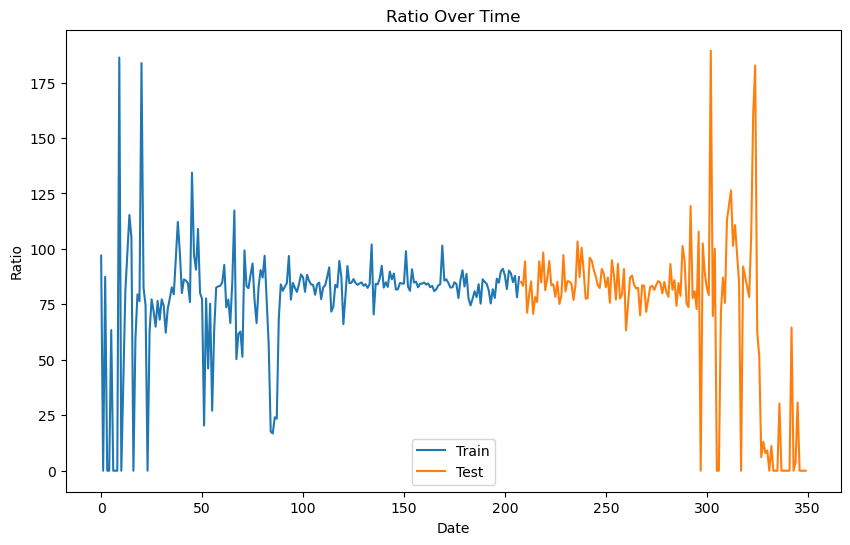

In [146]:
# Plotting the data
plt.figure(figsize=(10, 6))  # Setting the figure size for the plot
plt.plot(train_fbo0023["Ratio"], label='Train')  # Plotting the training data
plt.plot(test_fbo0023["Ratio"], label='Test')  # Plotting the testing data
plt.title('Ratio Over Time')  # Title of the plot
plt.xlabel('Date')  # X-axis label
plt.ylabel('Ratio')  # Y-axis label
plt.legend()  # Adding a legend to the plot
plt.show()  # Displaying the plot

In [147]:
# ARIMA modeling
from pmdarima import auto_arima  # Importing the auto_arima function from pmdarima
print(train_fbo0023["Ratio"])  # Printing CO2 values from the train set
train1 = train_fbo0023["Ratio"]  # Creating a new series 'train1' for ARIMA modeling
auto_model = auto_arima(train1, seasonal=False, trace=True, error_action="ignore", suppress_warnings=True)  # Fitting the ARIMA model
auto_model.summary()  # Displaying the summary of the model

0      96.956513
1       0.000000
2      87.450395
3       0.000000
4       0.000000
         ...    
203    88.963192
204    85.031328
205    87.860779
206    78.230325
207    87.249345
Name: Ratio, Length: 205, dtype: float64
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1986.778, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1922.142, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1880.416, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1984.779, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1884.369, Time=0.21 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1879.498, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1880.572, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=1880.856, Time=0.06 sec
 ARIMA(1,1,0)(0,0,

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  205
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -937.749
Date:                Fri, 12 Apr 2024   AIC                           1879.498
Time:                        10:40:32   BIC                           1886.134
Sample:                             0   HQIC                          1882.182
                                - 205                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8989      0.024    -38.217      0.000      -0.945      -0.853
sigma2       571.1600     21.468     26.605      0.000     529.083     613.237
===================================================================================
Ljung-Box (L1) (Q):                   0.83   Jarque-Bera (JB):              1495.13
Prob(Q):                              0.36   Prob(JB):                         0.00
Heteroskedasticity (H):               0.02   Skew:                             1.44
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [148]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import matplotlib.pyplot as plt
# Further ARIMA modeling and forecasting
from statsmodels.tsa.arima.model import ARIMA  # Importing the ARIMA model
#data.index.freq = "1min"  # Setting the frequency of the data index to 1 minute
#data.index = pd.DatetimeIndex(data.index).to_period("1min")  # Converting the data index to DatetimeIndex with 1-minute period


In [170]:
#np.asarray(train_fbo0023)

train_fbo0023.dtypes

PlantKey                   object
PRType                      int64
ValueTime          datetime64[ns]
Ratio                     float64
Area                        int64
InstEffekt                float64
SunRad                      int64
EffectProd                  int64
Temperature               float64
Created                    object
LastModified               object
Theoretical               float64
SimilarPlantKey           float64
dtype: object

In [167]:
model = ARIMA(train_fbo0023, order=(1, 1, 1))  # Initializing the ARIMA model with specified order
fitted_model = model.fit()  # Fitting the ARIMA model

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [165]:
forecast = fitted_model.forecast(steps=len(train_fbo0023))  # Forecasting using the fitted model


C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
